In [1]:
import datasets
import torch.utils.data as data
import torch
import wandb
import matplotlib.pyplot as plt


In [3]:
t = torch.ones(3)
print(t)
t2 = 3 * t
print(t2)

tensor([1., 1., 1.])
tensor([3., 3., 3.])


In [2]:
train_dataset_not_nor = datasets.ACDCDataset("/home/guests/manal_hamdi/manal/RAFT/datasets/ACDC_processed/", "training",19, False)
train_loader_not_nor = data.DataLoader(train_dataset_not_nor, batch_size=1, pin_memory=False, shuffle=True, num_workers=4, drop_last=True)

In [3]:
print(len(train_dataset_not_nor))

943


In [12]:
c_ = []
intens_not_norm = []
for i in range(0, len(train_dataset_not_nor)):
    image_batch, template_batch, patient_slice_id_batch = train_dataset_not_nor[i]    
    intens_not_norm.append(torch.max(image_batch))
    c_.append(i)

Text(0.5, 1.0, 'Not Normalised intensity')

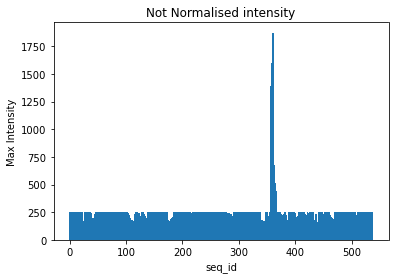

In [13]:
plt.bar(c_, intens_not_norm, width=3)
plt.xlabel('seq_id')
plt.ylabel('Max Intensity')
plt.title('Not Normalised intensity')

In [14]:
train_norm = datasets.ACDCDataset("/home/guests/manal_hamdi/manal/RAFT/datasets/ACDC_processed/", "validation",19, True)
train_loader = data.DataLoader(train_norm, batch_size=1, pin_memory=False, shuffle=True, num_workers=4, drop_last=True)

In [15]:
c_ = []
intens_norm = []
for i in range(0, len(train_norm)):
    c_.append(i)
    image_batch, template_batch, patient_slice_id_batch = train_norm[i]
    intens_norm.append(torch.max(image_batch))


Text(0.5, 1.0, 'Sequence Normalised intensity')

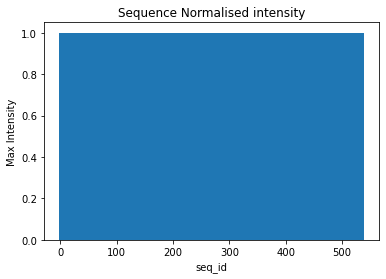

In [16]:
plt.bar(c_, intens_norm, width=3)
plt.xlabel('seq_id')
plt.ylabel('Max Intensity')
plt.title('Sequence Normalised intensity')

In [25]:
def tensor_normalization( tnsr):
    return (tnsr - torch.min(tnsr)) / (torch.max(tnsr) - torch.min(tnsr))

In [29]:
print(intens_norm[360].item())
print(intens_not_norm[360].item())

1.0
1871.0


In [21]:
c_ = []
intens = []
for i in range(0, len(train_dataset)):
    c_.append(i)
    image_batch, template_batch, patient_slice_id_batch = train_dataset[i]
    m = torch.max(image_batch)
    if (m < 1):
        print("less than 1")
    intens.append(m)

less than 1
less than 1


Text(0.5, 1.0, 'Normalised intensity')

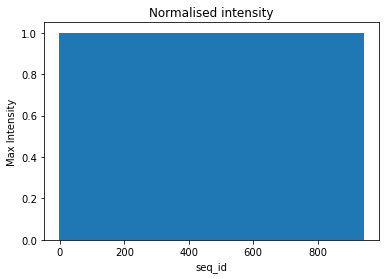

In [22]:
plt.bar(c_, intens, width=3)
plt.xlabel('seq_id')
plt.ylabel('Max Intensity')
plt.title('Normalised intensity')

In [2]:
wandb.init(project="test-project", entity="manalteam")

wandb: Currently logged in as: manalhamdi (manalteam). Use `wandb login --relogin` to force relogin


In [20]:
s_dataset, t_dataset, n = train_dataset[1]
print(s.shape)
print(t.shape)

torch.Size([15, 216, 256])
torch.Size([15, 216, 256])


In [22]:
s_norm = tensor_normalization(s_dataset)

In [23]:
train_dataset_norm = datasets.ACDCDataset("/home/guests/manal_hamdi/manal/RAFT/datasets/ACDC_processed/", "training",15, True)


In [24]:
s_dataset_norm, t_dataset_norm, n = train_dataset_norm[1]


In [26]:
assert s_dataset_norm.all() == s_norm.all()

In [21]:

def image_normalization(image, scale=1):
    return scale * (image - np.min(image)) / (np.max(image) - np.min(image))
    
def tensor_normalization(tnsr):
    return (tnsr - torch.min(tnsr)) / (torch.max(tnsr) - torch.min(tnsr))

In [6]:
import numpy as np
max_w = 0
for i_batch, data_blob in enumerate(train_loader):
    image_batch, template_batch, patient_slice_id_batch = [x for x in data_blob]
    _, s, h, w = image_batch.shape
    if (w > max_w):
        max_w = w
print(max_w)

288


In [12]:
t = np.ones([100,200,3])
print(t.shape)
b = np.transpose(t, (2,0,1))
print(b.shape)

(100, 200, 3)
(3, 100, 200)


In [2]:
train_dataset = datasets.ACDCDataset("/home/kevin/manal/RAFT/datasets/ACDC_processed/", "validation",15,False)
train_loader = data.DataLoader(train_dataset, batch_size=1, pin_memory=False, shuffle=True, num_workers=4, drop_last=True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/kevin/manal/RAFT/datasets/ACDC_processed/validation/'

In [40]:
len(train_dataset)

538

In [19]:
min_ = 1000
max_ = 0
for i in range(0,len(train_dataset)):
    img, tmp, name = train_dataset[i]
    c_min = torch.min(img).item()
    c_max = torch.max(img).item()
    if(c_min < min_):
        min_ = c_min
    if (c_max > max_):
        max_ = c_max

In [21]:
print(min_, max_)

0.0 4095.0


In [30]:
from utils.utils import bilinear_sampler, coords_grid, upflow8

coords0 = coords_grid(1, 4, 4, device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
)

In [33]:
print(coords0[0,:,:,:])

tensor([[[0., 1., 2., 3.],
         [0., 1., 2., 3.],
         [0., 1., 2., 3.],
         [0., 1., 2., 3.]],

        [[0., 0., 0., 0.],
         [1., 1., 1., 1.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.]]], device='cuda:0')


In [15]:
print(b[::2,:,:].shape)

(2, 100, 200)


In [14]:
all_flows_fwd = np.empty([15, 3, 100, 200])
print(all_flows_fwd.shape)

(15, 3, 100, 200)


In [5]:
wandb.log({"gif": wandb.Video(a*255, fps=2, format="gif")})


In [11]:
st = np.array([15, 1, 256, 216])
img1 = np.asarray(image_batch[0,:,:,:].permute(1, 2, 0))
img2 = np.asarray(image_batch[0,:,:,:].permute(1, 2, 0))
img = np.concatenate((img1, img2), axis=0)
print(img1.shape)
print(img.shape)

(256, 216, 15)
(512, 216, 15)


In [13]:
flow = a[0,:,:,:]
print(flow.shape)

(1, 256, 216)


In [17]:
def image_normalization(image, scale=1):
        return scale * (image - np.min(image)) / (np.max(image) - np.min(image))

In [44]:
norm = image_normalization(a)
norm2 = norm * np.max(a) + np.min(a)
norm2 = norm2.astype(int)
assert norm2.all() == a.all() 

In [13]:
if not self.debug:
    self.log_metrics_dict.update({'train/lr': self.scheduler.scheduler.get_last_lr()[0]})  # todo: temporarily added to check the lr
    wandb.log(self.log_metrics_dict)
    wandb.log({'recon_imgs': [wandb.Video(self.log_vis_dict[key], caption=key, fps=2) for key in self.log_vis_dict.keys()]})

NameError: name 'self' is not defined

In [5]:
for i in range(9):
    print(i)

0
1
2
3
4
5
6
7
8


In [4]:
print(len(train_dataset))

538


In [ ]:
import matplotlib.pyplot as plt
import imageio
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in ['1.png', '2.png', '3.png', '4.png']:
        image = imageio.imread(filename)
        writer.append_data(image)

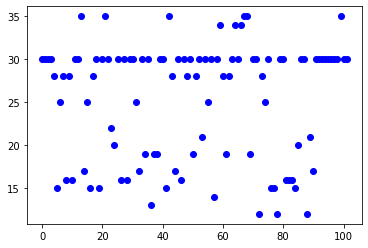

In [36]:
i_list, h_list = [], []
for i in range(0, len(train_dataset)):
    img, tmp = train_dataset[i]
    i_list.append(i)
    h_list.append(img.shape[0])
    if(i>100):
        break
plt.plot(i_list, h_list, 'bo')

In [16]:
min_h, min_w = 1000, 1000
max_h, max_w = 0, 0
for i in range(0, len(train_dataset)):
    img, tmp = train_dataset[i]
    h, w = img.shape[1], img.shape[2]
    if(min_h > h):
        min_h = h
    if(min_w > w):
        min_w = w
    if (max_h < h):
        max_h = h
    if (max_w < w):
        max_w = w
print("Min and max of H", min_h, max_h)
print("Min and max of W", min_w, max_w)

Min and max of H 152 424
Min and max of W 152 512


In [18]:
dict_h = {}
dict_w = {}
dict_s = {}
for i in range(0, len(train_dataset)):
    img, tmp = train_dataset[i]
    s, h, w = img.shape
    dict_h[h] = 0
    dict_w[w] = 0
    dict_s[s] = 0
for i in range(0, len(train_dataset)):
    img, tmp = train_dataset[i]
    s, h, w = img.shape
    dict_h[h] += 1
    dict_w[w] += 1
    dict_s[s] += 1

NameError: name 'train_dataset' is not defined

In [18]:
all_h = []
all_count_h = []
all_w = []
all_count_w = []
all_s = []
all_count_s = []
for h, count_h in dict_h.items():
    all_h.append(h)
    all_count_h.append(count_h)

for w, count_w in dict_w.items():
    all_w.append(w)
    all_count_w.append(count_w)
for s, count_s in dict_s.items():
    all_s.append(s)
    all_count_s.append(count_s)


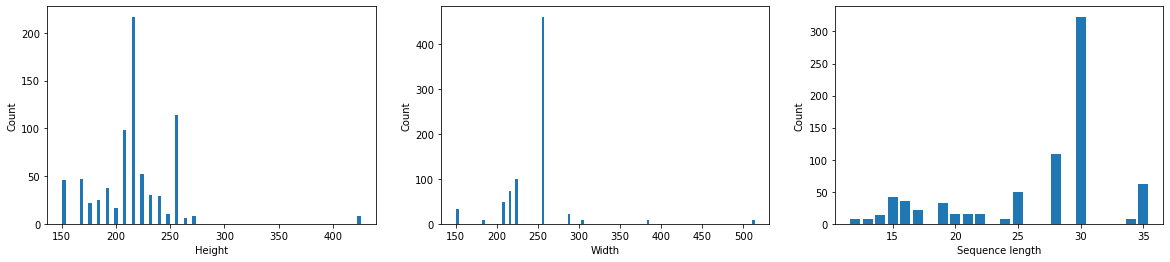

In [22]:
plt.subplot(132)
plt.bar(all_w, all_count_w, width=3)
plt.xlabel('Width')
plt.ylabel('Count')

plt.subplot(133)
plt.bar(all_s, all_count_s)
plt.xlabel('Sequence length')
plt.ylabel('Count')

plt.show()


([<matplotlib.axis.XTick at 0x7f79ee9ce020>,
 [Text(0, 0, 'Morocco'),
  Text(1, 0, 'Tunisia'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'Algeria'),
  Text(4, 0, 'Libya'),
  Text(5, 0, 'Sudan')])

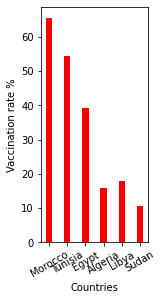

In [7]:
import matplotlib.pyplot as plt
vac_rate = [65.5, 54.4, 39.2, 15.9, 17.9, 10.7]
countries = ['Morocco', 'Tunisia', 'Egypt', 'Algeria', 'Libya', 'Sudan']
plt.subplot(132)
plt.bar(countries, vac_rate, width=0.35, align='center', color='r')
plt.xlabel('Countries')
plt.ylabel('Vaccination rate %')
plt.tight_layout()


plt.xticks(range(len(countries)),('Morocco', 'Tunisia', 'Egypt', 'Algeria', 'Libya', 'Sudan'), rotation=30)
       



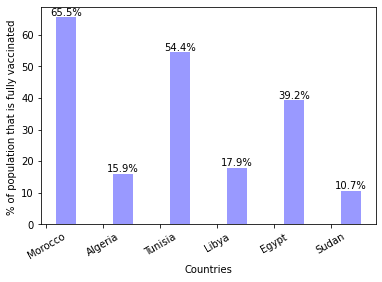

In [19]:
import matplotlib.pyplot as plt
import numpy as np

errorRateListOfFast = [65.5, 15.9, 54.4,17.9, 39.2, 10.7]


# Convert to floats
errorRateListOfFast = [float(x) for x in errorRateListOfFast]


opacity = 0.4
bar_width = 0.35

plt.xlabel('Countries')
plt.ylabel('% of population that is fully vaccinated ')

plt.xticks(range(len(errorRateListOfFast)),('Morocco', 'Algeria', 'Tunisia', 'Libya', 'Egypt', 'Sudan'), rotation=30)
bar1 = plt.bar(np.arange(len(errorRateListOfFast)) + bar_width, errorRateListOfFast, bar_width, align='center', alpha=opacity, color='b', label='Fast <= 6 sec.')


# Add counts above the two bar graphs
for rect in bar1 :
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, str(height)+'%', ha='center', va='bottom')


plt.show()

In [5]:
min_s = 1000
max_s = 0
for i in range(0, len(train_dataset)):
    img, tmp = train_dataset[i]
    s = img.shape[0]
    if(min_s > s):
        min_s = s
    if (max_s < s):
        max_s = s
print(min_s, max_s)               

12 35


In [25]:
writer = SummaryWriter()


In [29]:
import wandb
wandb.init(project="test-project", entity="manalteam")


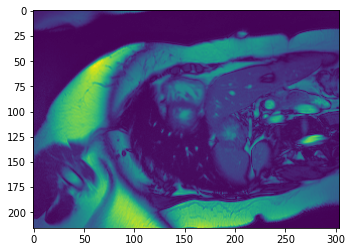

In [28]:
for i_batch, data_blob in enumerate(train_loader):
    image_batch, template_batch = [x for x in data_blob] # old [B, C, H, W] new [B, N, H, W], [B, N, H, W]
    plt.imshow(template_batch[0,0,:,:])
    wandb.log({"loss": wandb.Image(template_batch[0,0,:,:])})
    writer.add_image("some"+str(i_batch), template_batch[0,0,:,:].view(1, template_batch[0,0,:,:].shape[0], template_batch[0,0,:,:].shape[1]), dataformats='CHW')
    break


In [6]:
import tensorboard
print(f"Tensorboard version: {tensorboard.__version__}")
%load_ext tensorboard
%tensorboard --logdir runs/
%reload_ext tensorboard

Tensorboard version: 2.9.1


Reusing TensorBoard on port 6006 (pid 697670), started 1:22:28 ago. (Use '!kill 697670' to kill it.)

In [4]:
import torch
torch.cuda.empty_cache()
import gc
del variables
gc.collect()


NameError: name 'variables' is not defined

In [30]:
import tensorboard
print(f"Tensorboard version: {tensorboard.__version__}")
%load_ext tensorboard
%tensorboard --logdir ../runs/
%reload_ext tensorboard

Tensorboard version: 2.9.1
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 698578), started 0:00:02 ago. (Use '!kill 698578' to kill it.)

In [1]:
import torch
import datasets as datasets
import matplotlib.pyplot as plt

In [3]:
coords = torch.ones(5, 2, 46, 62)
coords = coords.permute(0, 2, 3, 1) #[B, H, W, 2]
batch, h1, w1, _ = coords.shape
print(batch, h1, w1)
print(coords.reshape(batch*h1*w1, 1, 1, 2).shape)


5 46 62
torch.Size([14260, 1, 1, 2])


In [4]:
coords = torch.ones(5, 2, 46, 62)
l = [coords, coords]
torch.stack(l, dim=1).shape

torch.Size([5, 2, 2, 46, 62])

In [8]:
coords = torch.ones(5, 1, 2, 46, 62)
coords.permute(0, 2, 3, 1)

RuntimeError: number of dims don't match in permute

In [2]:
import datasets as datasets

In [3]:
train_dataset = datasets.ACDCDataset("../datasets/ACDC_processed/training", "training")

In [4]:
pwd

'/home/guests/manal_hamdi/manal/RAFT/core'

In [4]:
seq, template = train_dataset[0]
print(seq.shape)
print(template.shape)

torch.Size([5, 216, 256])
torch.Size([5, 216, 256])


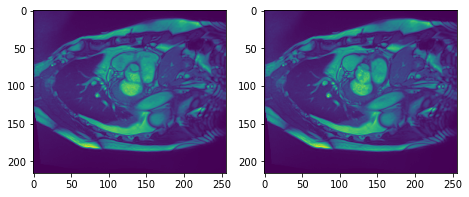

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20))
columns = 5
rows = 2
j = 1
i = 0
while(i < 5):
    fig.add_subplot(rows, columns, j)
    j += 1
    plt.imshow(seq[i,:,:])
    i += 3


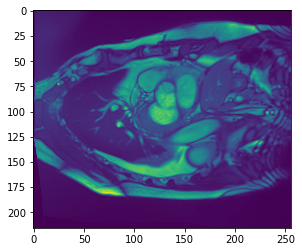

In [8]:
plt.imshow(template[0,:,:])


In [5]:
from os import listdir
from os.path import isfile, join
mypath = "RAFT/datasets/ACDC_processed/training"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles[0])

FileNotFoundError: [Errno 2] No such file or directory: 'RAFT/datasets/ACDC_processed/training'

In [10]:
import torch
temp = torch.ones(5, 7, 6, 4)
print(temp.shape)

torch.Size([5, 7, 6, 4])


In [13]:
print(temp[0,0,:,:].view(1, temp[0,0,:,:].shape[0], temp[0,0,:,:].shape[1]).shape)

torch.Size([1, 6, 4])


In [6]:
import torchvision as tv
import numpy as np
to_tensor = tv.transforms.ToTensor()
seq = np.empty([3, 4, 5]) # h, w, n
seq_tensor = to_tensor(seq) # n, h, w
print(seq_tensor.shape)

torch.Size([5, 3, 4])


In [7]:
torch.cuda.device_count()

8

In [10]:
torch.cuda.device_count()

8

In [4]:
!pip3 uninstall torch -Y



Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: -Y


In [8]:
W = 4
H = 5
B = 6
yy = torch.arange(0, H).view(-1, 1).repeat(1, W)
print(yy.shape)

torch.Size([5, 4])


In [9]:
W = 4
H = 5
B = 6
N = 10
xx = torch.arange(0, W).view(1, -1).repeat(H, 1) # here we have grid [H, W] 0++
yy = torch.arange(0, H).view(-1, 1).repeat(1, W) # here we have grid [H, W] 0++
xx = xx.view(1, 1, H, W).repeat(N, 1, 1, 1) # [B, 1, H, W]
yy = yy.view(1, 1, H, W).repeat(N, 1, 1, 1) # [B, 1, H, W]
grid = torch.cat((xx, yy), 1).float() # [B, 2, H, W]
print(grid.shape) #[B, 2, H, W]


torch.Size([10, 2, 5, 4])


In [10]:
x = torch.ones(N, H, W)
flo = torch.zeros(N, 2, H, W)
mask = torch.ones(x.size(), dtype=x.dtype) # [N, H, W]
if x.is_cuda:
    grid = grid.cuda()
    mask = mask.cuda()
        
flo = torch.flip(flo, dims=[1])
# vgrid = Variable(grid) + flo
vgrid = grid + flo #[N, 2, H, W]

# scale grid to [-1,1]
vgrid[:, 0, :, :] = 2.0 * vgrid[:, 0, :, :].clone() / max(W - 1, 1) - 1.0
vgrid[:, 1, :, :] = 2.0 * vgrid[:, 1, :, :].clone() / max(H - 1, 1) - 1.0

vgrid = vgrid.permute(0, 2, 3, 1) #[N, H, W, 2]
output = torch.nn.functional.grid_sample(x.view(N, 1, H, W), vgrid, align_corners=True) # [N, H, W]

mask = torch.nn.functional.grid_sample(mask.view(N, 1, H, W), vgrid, align_corners=True)

mask[mask < 0.9999] = 0
mask[mask > 0] = 1
s = output * mask
print(s.view(N, H, W).shape)

torch.Size([10, 5, 4])


In [11]:
10.5//2

5.0

In [12]:
from utils.utils import bilinear_sampler, coords_grid, upflow8
W = 100
H = 100
B = 6
N = 10
c0 = coords_grid(B, H//8, W//8, device=mask.device)
c1 = coords_grid(B, H//8, W//8, device=mask.device)
print(c1.shape)
print(c0.shape)

torch.Size([6, 2, 12, 12])
torch.Size([6, 2, 12, 12])


In [17]:
N = 10
B = 6
C = 3
H = 5
W = 4

x = torch.randn(B, N, C, H, W) #[B, C, H, W]
flo = torch.randn(B, N, 2, H, W)
warped_seq_list = []
for b in range(0, x.shape[0]):
    seq = x[b, :, :, :] #[N, C, H, W]
    flo_seq = flo[b, :, :, :] 
    #output = warp_torch(x, flo)
    print("Seq to give to wrap", seq.shape, "with flow", flo_seq.shape)
    warped_seq = warp_torch(seq, flo_seq) # [N, C, H, W]
    print(warped_seq.shape)
    warped_seq_list.append(warped_seq)
warped_batch = torch.stack(warped_seq_list, dim=0)
print(warped_batch.shape) # [B, N, C, H, W]
# [B, N, C, H, W]
#output = warp_torch(x, flo)
#print(output.shape) # [B, C, H, W]


Seq to give to wrap torch.Size([10, 3, 5, 4]) with flow torch.Size([10, 2, 5, 4])
torch.Size([10, 3, 5, 4])
Seq to give to wrap torch.Size([10, 3, 5, 4]) with flow torch.Size([10, 2, 5, 4])
torch.Size([10, 3, 5, 4])
Seq to give to wrap torch.Size([10, 3, 5, 4]) with flow torch.Size([10, 2, 5, 4])
torch.Size([10, 3, 5, 4])
Seq to give to wrap torch.Size([10, 3, 5, 4]) with flow torch.Size([10, 2, 5, 4])
torch.Size([10, 3, 5, 4])
Seq to give to wrap torch.Size([10, 3, 5, 4]) with flow torch.Size([10, 2, 5, 4])
torch.Size([10, 3, 5, 4])
Seq to give to wrap torch.Size([10, 3, 5, 4]) with flow torch.Size([10, 2, 5, 4])
torch.Size([10, 3, 5, 4])
torch.Size([6, 10, 3, 5, 4])


In [24]:
if (warped_batch.shape ==  torch.Size([B, N, C, H, W])):
    print("raft.warp_batch test for output tensor passed.")
else:
    print("raft.warp_batch test for output tensor failed. Supposed to be", [B, N, C, H, W], ", instead it is", warped_batch.shape.value)

raft.warp_batch test for output tensor passed.


In [7]:
def warp_torch(x, flo):
        """
        @author: Jiazhen Pan
        warp an image/tensor (im2) back to im1, according to the optical flow
        x: [B, C, H, W] (im2)  Convert to [B, N, C, H, W]
        flo: [B, 2, H, W] flow
        """
        B, C, H, W = x.size()
        # mesh grid
        xx = torch.arange(0, W).view(1, -1).repeat(H, 1) # here we have grid [H, W] 0++
        yy = torch.arange(0, H).view(-1, 1).repeat(1, W)
        xx = xx.view(1, 1, H, W).repeat(B, 1, 1, 1)
        yy = yy.view(1, 1, H, W).repeat(B, 1, 1, 1)
        grid = torch.cat((xx, yy), 1).float() # [B, 2, H, W] Coordinates

        mask = torch.ones(x.size(), dtype=x.dtype) # [B, C, H, W]
        if x.is_cuda:
            grid = grid.cuda()
            mask = mask.cuda()
        
        flo = torch.flip(flo, dims=[1])
        # vgrid = Variable(grid) + flo
        vgrid = grid + flo #[B, 2, H, W] # coordinates of pixels after motion

        # scale grid to [-1,1]
        vgrid[:, 0, :, :] = 2.0 * vgrid[:, 0, :, :].clone() / max(W - 1, 1) - 1.0
        vgrid[:, 1, :, :] = 2.0 * vgrid[:, 1, :, :].clone() / max(H - 1, 1) - 1.0

        vgrid = vgrid.permute(0, 2, 3, 1) #[B, H, W, 2]
        output = torch.nn.functional.grid_sample(x, vgrid, align_corners=True)
        mask = torch.nn.functional.grid_sample(mask, vgrid, align_corners=True)

        mask[mask < 0.9999] = 0
        mask[mask > 0] = 1

        return output * mask
        

In [32]:
flo1 = torch.randn(B, 2, H, W)
print(flo1.shape)
flo2 = torch.flip(flo1, dims=[0])
print(flo2.permute(0, 2, 3, 1).shape)

torch.Size([6, 2, 5, 4])
torch.Size([6, 5, 4, 2])


In [21]:
W = 4
H = 5
N = 10
B = 6
xx = torch.arange(0, W).view(1, -1).repeat(H, 1) #  [H, W] 
yy = torch.arange(0, H).view(-1, 1).repeat(1, W) #  [H, W]

xx = xx.view(1, 1, H, W).repeat(N, 1, 1, 1)  #    [N, 1, H, W]
yy = yy.view(1, 1, H, W).repeat(N, 1, 1, 1)  #    [N, 1, H, W]

xx = xx.view(1, N, 1, H, W).repeat(B, 1, 1, 1, 1)  #    [B, N, 1, H, W]
yy = yy.view(1, N, 1, H, W).repeat(B, 1, 1, 1, 1)  #    [B, N, 1, H, W]

grid = torch.cat((xx, yy), 2).float()        #[B, N, 2, H, W]
print(grid.shape) #[B, N, 2, H, W]  
print(xx.shape)
print(yy.shape)


torch.Size([6, 10, 1, 5, 4])
torch.Size([6, 10, 1, 5, 4])
torch.Size([6, 10, 2, 5, 4])


In [39]:
import torch
a = torch.ones(3, 256, 256)
b = torch.randn(3, 256, 256)
my_list = [a, b]
s = torch.stack(my_list, dim=0)
result = s.mean(dim=0)
print("List with length", len(my_list))
print("List with tensors each with shape", a.shape)
print("After stacking along axis 0", s.shape) #torch.Size([5])
print("After mean along axis 0",result.shape)

List with length 2
List with tensors each with shape torch.Size([3, 256, 256])
After stacking along axis 0 torch.Size([2, 3, 256, 256])
After mean along axis 0 torch.Size([3, 256, 256])


In [2]:
def construct_template_average(seq):
    # 1 seq --> [N, C, H, W]
    # 1 batch --> [B, N, C, H, W]
    if (len(seq.shape) == 4):
        '''seq is a list of tensors each with shape [N, C, H, W]
        Returns tensor [C, H, W]'''
        return seq.mean(dim=0)
    elif (len(seq.shape) == 5):
        '''seq is a list of tensors each with shape [B, N, C, H, W]
        Returns tensor [B, C, H, W]'''
        return seq.mean(dim=1)

In [3]:
e = torch.ones(5, 3, 2, 4)
print("Input is",e.shape)
print(construct_template_average(e).shape)

Input is torch.Size([5, 3, 2, 4])
torch.Size([3, 2, 4])


In [7]:

result = torch.randn(e.shape[1], e.shape[2], e.shape[3])

for n in range(0, e.shape[0]):
    for c in range(0, e.shape[1]):
        for h in range(0, e.shape[2]):
            for w in range(0, e.shape[3]):
                result[c,h,w] += e[n,c,h,w]
result /= e.shape[0]

assert result.all() == construct_template_average(e).all()

In [57]:
e = torch.ones(10, 5, 3, 2, 4)
print("Input is",e.shape)
print(construct_template_average(e).shape)

Input is torch.Size([10, 5, 3, 2, 4])
torch.Size([10, 3, 2, 4])


In [2]:

%env TENSORBOARD_BINARY=".local/bin/tensorboard"

env: TENSORBOARD_BINARY=".local/bin/tensorboard"


In [14]:
ls -la ../

total 4
drwxrwxr-x.  4 manal_hamdi manal_hamdi   56 Jun  6 11:53 ./
drwxr-x---.  9 manal_hamdi manal_hamdi  183 Jun  6 12:47 ../
drwxrwxr-x. 10 manal_hamdi manal_hamdi 4096 Jun  6 12:51 CardioLocalization/
drwx------.  2 manal_hamdi manal_hamdi   99 Jun  6 11:53 .ssh/


In [2]:
import torch
data_module = module.STNDataModule()
model = net.STN_Net(lr=0.001, m_loss_coef=10, i_loss_coef=0.01)
logger = TensorBoardLogger("../../../../vol/alpaca/users/manal/stretch", name="my_model")
trainer = pl.Trainer(resume_from_checkpoint="../../../../vol/alpaca/users/manal/stretch/my_model/version_10/checkpoints/epoch=32-step=1353.ckpt", 
                     devices=1, 
                     accelerator='gpu', logger=logger)
trainer.fit(model, data_module)

/home/guests/manal_hamdi/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:51: LightningDeprecationWarning: Setting `Trainer(resume_from_checkpoint=)` is deprecated in v1.5 and will be removed in v1.7. Please pass `Trainer.fit(ckpt_path=)` directly instead.
  rank_zero_deprecation(
/home/guests/manal_hamdi/.local/lib/python3.8/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/guests/manal_hamdi/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:807: LightningDeprecationWarning: `trainer.resume_from_checkpoint` is deprecated in v1.5 and will be removed in v2.0. Specify the fit checkpoint path with `trainer.fit(ckpt_path=)` i

The number of patients is 20359
The number of patients is 2536


FileNotFoundError: Checkpoint at ../../../../vol/alpaca/users/manal/stretch/my_model/version_10/checkpoints/epoch=32-step=1353.ckpt not found. Aborting training.

In [8]:
import helper_code.STN_Net as net
import helper_code.STN_DataModule as module
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
import importlib
import helper_code.STN_Dataset as dl
import helper_code.utils as u
import helper_code.stn_utils as stn_dl
from torch.utils.data import DataLoader
import torch
import numpy as np 
import torch.utils.data as data
import torch
from nilearn import plotting
from nilearn import image
import os
import numpy as np
from nibabel.testing import data_path
import matplotlib.pyplot as plt
import nibabel as nib
import math
from torchvision.transforms import ToTensor
from skimage.measure import label, regionprops, regionprops_table
from helper_code.utils import GetBbox
import helper_code.utils as u
import helper_code.STN_Dataset as dl
from torch.utils.data import DataLoader
import helper_code.stn_utils as stn_dl
import importlib
import cv2
import csv
import matplotlib.pyplot as plt

In [7]:
 pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████▊                | 1002.3 MB 115.8 MB/s eta 0:00:09

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████▏               | 1033.3 MB 10.9 MB/s eta 0:01:33

     |████████████████████▏           | 1284.9 MB 114.3 MB/s eta 0:00:07

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |█████████████████████▏          | 1348.5 MB 110.8 MB/s eta 0:00:07

     |█████████████████████▎          | 1354.5 MB 110.8 MB/s eta 0:00:07

     |█████████████████████▎          | 1360.5 MB 110.8 MB/s eta 0:00:07

     |█████████████████████▍          | 1366.5 MB 110.8 MB/s eta 0:00:07

     |█████████████████████▌          | 1372.5 MB 110.8 MB/s eta 0:00:07

     |█████████████████████▋          | 1378.5 MB 110.8 MB/s eta 0:00:06

     |█████████████████████▊          | 1384.6 MB 110.8 MB/s eta 0:00:06

     |█████████████████████▉          | 1390.6 MB 110.8 MB/s eta 0:00:06

     |██████████████████████          | 1396.6 MB 110.8 MB/s eta 0:00:06

     |██████████████████████          | 1402.6 MB 110.8 MB/s eta 0:00:06

     |██████████████████████          | 1408.6 MB 110.8 MB/s eta 0:00:06

     |██████████████████████▏         | 1414.6 MB 110.8 MB/s eta 0:00:06

     |██████████████████████▎         | 1420.6 MB 110.8 MB/s eta 0:00:06

     |██████████████████████▍         | 1426.6 MB 110.8 MB/s eta 0:00:06

     |██████████████████████▌         | 1432.6 MB 110.8 MB/s eta 0:00:06

     |██████████████████████▌         | 1438.6 MB 110.8 MB/s eta 0:00:06

     |██████████████████████▋         | 1441.8 MB 110.8 MB/s eta 0:00:06

     |███████████████████████▍        | 1495.4 MB 821 kB/s eta 0:11:05

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████▍       | 1555.6 MB 821 kB/s eta 0:09:52

     |████████████████████████▌       | 1561.6 MB 111.8 MB/s eta 0:00:05

     |████████████████████████▋       | 1567.6 MB 111.8 MB/s eta 0:00:05

     |████████████████████████▊       | 1573.6 MB 111.8 MB/s eta 0:00:05

     |████████████████████████▊       | 1578.5 MB 111.8 MB/s eta 0:00:05

     |████████████████████████▉       | 1582.3 MB 111.8 MB/s eta 0:00:05

     |█████████████████████████▎      | 1613.8 MB 111.8 MB/s eta 0:00:04  WARNING: The scripts convert-caffe2-to-onnx and convert-onnx-to-caffe2 are installed in '/home/guests/manal_hamdi/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.1
    Uninstalling torchvision-0.10.1:
      Successfully uninstalled torchvision-0.10.1
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.9.1
    Uninstalling torchaudio-0.9.1:
      Successfully uninstalled torchaudio-0.9.1
Note: you may need to restart the kernel to use updated packages.


In [6]:
conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                     |failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - alabaster -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0']
  - anaconda==2021.05 -> python[version='3.7.10|3.9.4|3.8.8',build='hdb3f193_5|hdb3f193_0']
  - appdirs -> python[version='>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|>=3.7,<3.8.0a0|>=3.6,<3.7.0a0']
  - argon2-cffi -> python[version='>=2.7,<2.8

contextlib2 -> python -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
jupyter_console -> python[version='>=3.6'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
nest-asyncio -> python[version='>=3.7,<3.8.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
widgetsnbextension -> python[version='>=3.10,<3.11.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
webencodings -> python[version='>=3.10,<3.11.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
dask-core -> python[version='>=3.9,<3.10.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
dask -> python[version='>=3.8,<3.9.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
patsy -> python[version='>=3.7,<3.8.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
threadpoolctl -> python[version='>=3.6'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
qtawesome -> python[version='>=3.6'] -> xz[versio


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install torch==1.9.1 torchvision==0.10.1 torchaudio==0.9.1

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'pytorch'
Note: you may need to restart the kernel to use updated packages.


In [3]:
conda update pytorch torchvision



PackageNotInstalledError: Package is not installed in prefix.
  prefix: /opt/anaconda3
  package name: pytorch



Note: you may need to restart the kernel to use updated packages.


In [9]:
%load_ext autoreload
%autoreload 2
importlib.reload(net)
importlib.reload(dl)
importlib.reload(stn_dl)
importlib.reload(u)
%reload_ext autoreload


In [1]:
import torch


In [ ]:
torch.

In [10]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data_module = module.STNDataModule()

# train
logger = TensorBoardLogger("rotation/", name="my_model")
#model = net.STN_Net(lr=0.0001, m_loss_coef=10, i_loss_coef=0.01)
model = net.STN_Net(lr=0.001, m_loss_coef=10, i_loss_coef=0.1)

trainer = pl.Trainer(max_epochs=200, logger=logger, devices=1, accelerator='gpu')

trainer.fit(model, data_module)

GPU available: True, used: True
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs
Missing logger folder: rotation/my_model
Missing logger folder: rotation/my_model


The number of patients is 20359
The number of patients is 2536


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name         | Type       | Params
--------------------------------------------
0 | localization | Sequential | 1.0 K 
1 | fc_loc       | Sequential | 460 K 
--------------------------------------------
461 K     Trainable params
0         Non-trainable params
461 K     Total params
1.848     Total estimated model params size (MB)

  | Name         | Type       | Params
--------------------------------------------
0 | localization | Sequential | 1.0 K 
1 | fc_loc       | Sequential | 460 K 
--------------------------------------------
461 K     Trainable params
0         Non-trainable params
461 K     Total params
1.848     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

The number of patients is 2536
patient_2_frame9_slice3.pngpatient_3_frame12_slice11.pngpatient_0_frame0_slice0.pngpatient_6_frame19_slice0.pngpatient_0_frame11_slice13.pngpatient_3_frame29_slice7.pngpatient_4_frame22_slice5.pngpatient_5_frame12_slice1.pngpatient_7_frame8_slice0.pngpatient_1_frame8_slice0.pngpatient_8_frame21_slice2.pngpatient_7_frame20_slice8.png            is None HEE.is None HEE.is None HEE.is None HEE.is None HEE.is None HEE.is None HEE.is None HEE.is None HEE.is None HEE.is None HEE.is None HEE.            validationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidation











patient_4_frame9_slice0.png is None HEE. validation


TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/guests/manal_hamdi/.local/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/guests/manal_hamdi/.local/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/guests/manal_hamdi/.local/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/guests/manal_hamdi/manal/CardioLocalization/helper_code/STN_Dataset.py", line 54, in __getitem__
    return self.get_item_from_index(key)
  File "/home/guests/manal_hamdi/manal/CardioLocalization/helper_code/STN_Dataset.py", line 92, in get_item_from_index
    img = to_tensor(self.image_normalization(img_f))
  File "/home/guests/manal_hamdi/manal/CardioLocalization/helper_code/STN_Dataset.py", line 63, in image_normalization
    return scale * (image - np.min(image)) / (np.max(image) - np.min(image))
TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'


In [5]:
import torch
print(torch.cuda.is_available())
print("torch version", torch.__version__)
print("Cuda version", torch.version.cuda)

import gc

gc.collect()

torch.cuda.empty_cache()

True
torch version 1.9.0+cu111
Cuda version 11.1


In [7]:
B = 4
N = 10
C = 3
H = 256
W = 256
img = torch.ones(B, N, C, H, W)
l = [img, img]
s = torch.stack(l, dim=1)
print(s.shape)

torch.Size([4, 2, 10, 3, 256, 256])


In [6]:
torch.tensor([1.0, 2.0]).cuda()

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [14]:
torch.tensor([1.0, 2.0]).cuda()

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [ ]:
conda install -c anaconda cudatoolkit=11.3

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 

In [4]:
torch.tensor([1.0, 2.0]).cuda()

RuntimeError: CUDA error: no kernel image is available for execution on the device
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [ ]:
conda install astunparse numpy ninja pyyaml setuptools cmake cffi typing_extensions future six requests dataclasses


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 

In [5]:
%tensorboard --logdir stretch/my_model

UsageError: Line magic function `%tensorboard` not found.
